# Example of working with time motifs.
This notebook gives an example for how to use this code to find time motifs (distinctive patterns in a time series which, in theory, are caused by similar underlying causes).

## 1. Import TSPF Stomp-Based Motif functions

In [1]:
from tspf_stomp.stomp import TSPFStomp


## 2. Generate time series
First, generate a randomized "time" series with "hidden" repeating patterns randomly spaced apart.

In [2]:
from tspf_util.generate import tsgenerate_motifs
timeseries = tsgenerate_motifs()
# The generate function returns a pandas dataframe with 'time' and 'data' columns
# The TSPFStomp functions work over an array of y-values for a timeseries.
ts = timeseries['data'].values

## 3. Initiate TSPFStomp class 

In [3]:
tspf = TSPFStomp()

## 4. Discover motifs
The discover function covers searches for motifs with a range of different durations, calling the stomp discovery algorithm and filtering repeats.

In [4]:
motifs = tspf.discover(ts, max_duration=60)
motifs = tspf.filter_candidates(motifs)

To get some insight into what the matrix profile gives us in the hunt of motifs, we can call the stomp algorithm directly - this gives us the MP for our timeseries for motif's of length 50. 

Text(0.5, 0, 'Sample')

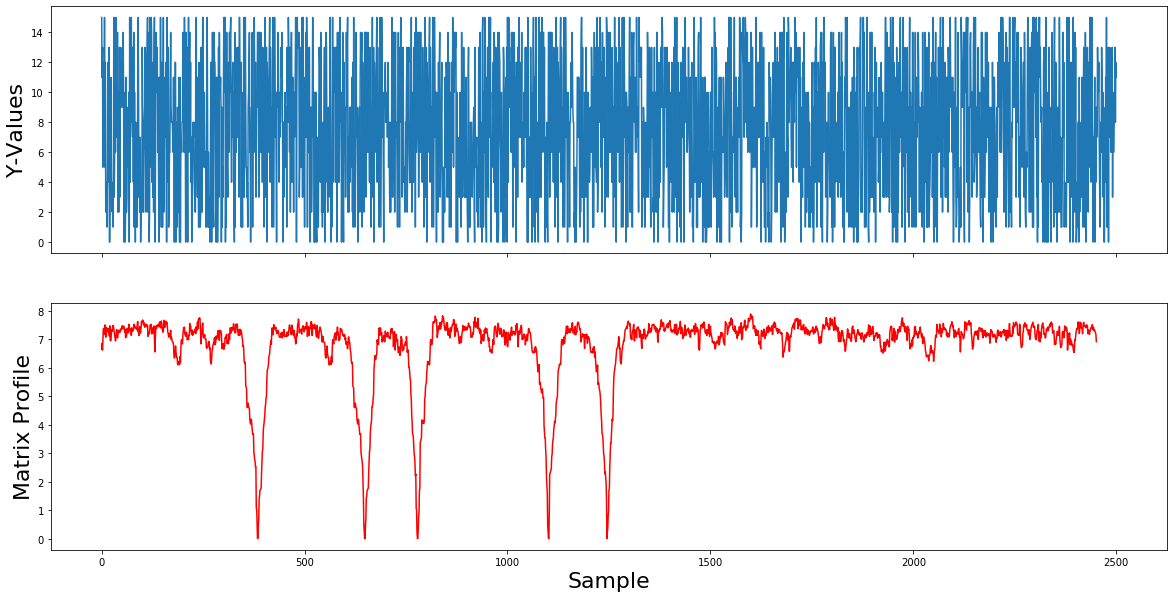

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matrixprofile import matrixProfile

mp = matrixProfile.stomp(timeseries['data'].values, 50)

fig1, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(timeseries['data'].values)),timeseries['data'], label="Time Series")
ax1.set_ylabel('Y-Values', size=22)

ax2.plot(np.arange(len(mp[0])), mp[0], label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

## 5. Examine shapes of motifs found
The tspf function 'discover' finds motifs of various lengths. To see the shape of these motifs, use the motif_shapes_from_tuple and supply the timeseries the motifs were discovered in along with the tuple list of motif discriptions returned from 'discover'.

Text(0.5, 0, 'Time')

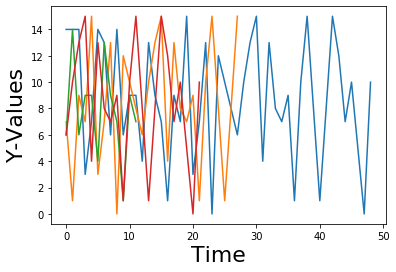

In [6]:
shapes = tspf.motif_shapes_from_tuple(motifs, ts)

for s in shapes:
    plt.plot(np.arange(len(s)),s)
    
plt.ylabel('Y-Values', size=22)
plt.xlabel('Time', size=22)

## 6. Locate motifs in other timeseries.
Once time motifs (common patterns) have been discovered, you can locate these specific motifs in any timeseries.
Here we look for one of the discovered motifs in our original timeseries.

In [8]:
located_motifs = tspf.locate(ts, shapes)